In [25]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,481 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and dire

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

os.chdir('/content/drive/MyDrive/AI+X_middle_02')

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

**AIVLE School 미니프로젝트**
### **공공데이터를 활용한 <span style="color:darkgreen">미세먼지 농도</span> 예측**
---

#### **<span style="color:red">[미션 안내]</span>**
* 개인 미션: 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요. ([2-1]부터 [2-10], [3-1]부터 [3-2] 까지 미션 수행)
* 조별 미션: 개인 미션 수행한 내용에 대해 토론하여 발표 준비를 해주세요.

#### **<span style="color:red">[주피터 노트북 파일 안내]</span>**
1. 탐색적 데이터 분석(solution).ipynb: 미션 수행 대상 아님. 제공된 solution을 참고하여 [2-1]부터의 미션 수행을 위한 탐색적 데이터 분석 진행</br>
2. 데이터 전처리.ipynb: [2-1]부터 [2-8] 까지 미션 수행 대상</br>
3. 모델링(머신러닝).ipynb: [3-1]부터 [3-2] 까지 미션 수행 대상. [4-1]~[4-4]는 선택 사항임</br>

#### **<span style="color:red">[데이터 설명]</span>**

* air_2021.csv : 2021년 미세먼지 데이터
* air_2022.csv : 2022년 미세먼지 데이터
* weather_2021.csv : 2021년 날씨 데이터
* weather_2022.csv : 2022년 날씨 데이터
* 학습 데이터: 2021년의 미세먼지 농도 데이터, 테스트 데이터: 2022년의 미세먼지 농도 데이터

# [Step 1] 탐색적 데이터 분석

#### **<span style="color:blue">[1-1] 필요한 라이브러리 설치</span>**

In [24]:
# 필요한 라이브러리 설치 및 임포트
%pip install pandas seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---

#### **<span style="color:blue">[1-2] 미세먼지 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'utf-8'
* index_col = 0

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 'air_2021.csv'파일을 'air_21' 변수에, 'air_2022.csv'파일을 'air_22' 변수에 저장
air_21 = pd.read_csv('air_2021.csv', sep=',', encoding='utf-8', index_col=0)
air_22 = pd.read_csv('air_2022.csv', sep=',', encoding='utf-8', index_col=0)

In [6]:
# air_21 데이터의 head 확인
air_21.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2021100101,0.003,0.6,0.002,0.039,31.0,18.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2021100102,0.003,0.6,0.002,0.035,27.0,16.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2021100103,0.003,0.6,0.002,0.033,28.0,18.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2021100104,0.003,0.6,0.002,0.030,26.0,16.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2021100105,0.003,0.5,0.003,0.026,26.0,16.0,서울 종로구 종로35가길 19


In [7]:
# air_21 데이터의 shape 확인
air_21.shape

(8760, 12)

In [8]:
# air_22 데이터의 head 확인
air_22.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2022010101,0.003,0.4,0.026,0.016,23.0,12.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2022010102,0.003,0.4,0.022,0.020,20.0,9.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2022010103,0.003,0.5,0.014,0.028,20.0,9.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2022010104,0.003,0.5,0.016,0.027,19.0,10.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2022010105,0.003,0.5,0.005,0.040,24.0,11.0,서울 종로구 종로35가길 19


In [9]:
# air_22 데이터의 shape 확인
air_22.shape

(2160, 12)

---

#### **<span style="color:blue">[1-3] 날씨 데이터 불러오기</span>**

* Pandas 라이브러리를 활용해서 'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장하고 그 데이터를 확인하세요.
* 구분자(sep) : ','
* encoder = 'cp949'

In [10]:
#'weather_2021.csv'파일을 'weather_21' 변수에, 'weather_2022.csv'파일을 'weather_22' 변수에 저장
weather_21 = pd.read_csv('weather_2021.csv', sep=',', encoding='cp949')
weather_22 = pd.read_csv('weather_2022.csv', sep=',', encoding='cp949')


In [11]:
# 미세먼지 데이터와 같이 날씨 데이터의 head, shape 등을 확인
weather_21.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2021-01-01 01:00,-8.7,NaN,NaN,NaN,2.4,NaN,270.0,...,NaN,2000,NaN,NaN,-6.9,NaN,-1.0,-0.8,0.3,1.6
1,108,서울,2021-01-01 02:00,-9.1,NaN,NaN,NaN,1.6,NaN,270.0,...,NaN,2000,NaN,NaN,-7.1,NaN,-1.1,-0.8,0.3,1.6
2,108,서울,2021-01-01 03:00,-9.3,NaN,NaN,NaN,1.1,NaN,250.0,...,NaN,2000,NaN,NaN,-7.3,NaN,-1.2,-0.9,0.3,1.6
3,108,서울,2021-01-01 04:00,-9.3,NaN,NaN,NaN,0.3,NaN,0.0,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.0,0.2,1.5
4,108,서울,2021-01-01 05:00,-9.7,NaN,NaN,NaN,1.9,NaN,20.0,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.3,-1.0,0.2,1.5


In [12]:
weather_21.shape

(8759, 38)

In [13]:
weather_22.head()

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
0,108,서울,2022-01-01 00:00,-8.5,NaN,NaN,NaN,1.9,NaN,320,...,NaN,2000,NaN,NaN,-7.0,NaN,-1.0,-1.0,-0.2,1.0
1,108,서울,2022-01-01 01:00,-9.2,NaN,NaN,NaN,1.8,NaN,270,...,NaN,2000,NaN,NaN,-7.2,NaN,-1.1,-1.1,-0.2,1.0
2,108,서울,2022-01-01 02:00,-9.5,NaN,NaN,NaN,1.2,NaN,270,...,NaN,2000,NaN,NaN,-7.5,NaN,-1.3,-1.2,-0.2,1.0
3,108,서울,2022-01-01 03:00,-9.3,NaN,NaN,NaN,1.4,NaN,290,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.2,-0.2,1.0
4,108,서울,2022-01-01 04:00,-9.6,NaN,NaN,NaN,1.7,NaN,340,...,NaN,2000,NaN,NaN,-7.6,NaN,-1.4,-1.3,-0.3,1.0


In [14]:
weather_22.shape

(2160, 38)

---

#### **<span style="color:blue">[1-4] 데이터 변수 확인</span>**

In [15]:
# 각 데이터프레임의 info 확인
air_21.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8760 non-null   object 
 1   망       8760 non-null   object 
 2   측정소코드   8760 non-null   int64  
 3   측정소명    8760 non-null   object 
 4   측정일시    8760 non-null   int64  
 5   SO2     8648 non-null   float64
 6   CO      8680 non-null   float64
 7   O3      8663 non-null   float64
 8   NO2     8680 non-null   float64
 9   PM10    8655 non-null   float64
 10  PM25    8663 non-null   float64
 11  주소      8760 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 889.7+ KB


In [16]:
air_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2160 non-null   object 
 1   망       2160 non-null   object 
 2   측정소코드   2160 non-null   int64  
 3   측정소명    2160 non-null   object 
 4   측정일시    2160 non-null   int64  
 5   SO2     2139 non-null   float64
 6   CO      2139 non-null   float64
 7   O3      2139 non-null   float64
 8   NO2     2139 non-null   float64
 9   PM10    2122 non-null   float64
 10  PM25    2135 non-null   float64
 11  주소      2160 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 219.4+ KB


In [17]:
weather_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8759 non-null   int64  
 1   지점명            8759 non-null   object 
 2   일시             8759 non-null   object 
 3   기온(°C)         8759 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        949 non-null    float64
 6   강수량 QC플래그      1763 non-null   float64
 7   풍속(m/s)        8757 non-null   float64
 8   풍속 QC플래그       2 non-null      float64
 9   풍향(16방위)       8757 non-null   float64
 10  풍향 QC플래그       2 non-null      float64
 11  습도(%)          8759 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8759 non-null   float64
 14  이슬점온도(°C)      8759 non-null   float64
 15  현지기압(hPa)      8759 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8759 non-null   float64
 18  해면기압 QC플

In [18]:
weather_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             2160 non-null   int64  
 1   지점명            2160 non-null   object 
 2   일시             2160 non-null   object 
 3   기온(°C)         2160 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        81 non-null     float64
 6   강수량 QC플래그      382 non-null    float64
 7   풍속(m/s)        2160 non-null   float64
 8   풍속 QC플래그       0 non-null      float64
 9   풍향(16방위)       2160 non-null   int64  
 10  풍향 QC플래그       0 non-null      float64
 11  습도(%)          2160 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       2160 non-null   float64
 14  이슬점온도(°C)      2160 non-null   float64
 15  현지기압(hPa)      2160 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      2160 non-null   float64
 18  해면기압 QC플

---

#### **<span style="color:blue">[1-5] 미세먼지 데이터 분석</span>**

* 데이터 전처리와 모델링을 위해 데이터 분석을 진행해보세요. 시각화 등을 통해 관측치들의 패턴 탐색, 잘못된 자료 탐색, 변수들간의 관계 파악을 할 수 있습니다.

In [20]:
# air_21,air_22 의 다양한 변수에 대하여 시각화
air_21['측정일시'] = pd.to_datetime(air_21['측정일시'], format='%Y%m%d%H', errors='coerce')
air_22['측정일시'] = pd.to_datetime(air_22['측정일시'], format='%Y%m%d%H', errors='coerce')


In [21]:
air_21['연도'] = air_21['측정일시'].dt.year
air_21['월'] = air_21['측정일시'].dt.month
air_21['일'] = air_21['측정일시'].dt.day
air_21['시간'] = air_21['측정일시'].dt.hour

In [22]:
air_22['연도'] = air_22['측정일시'].dt.year
air_22['월'] = air_22['측정일시'].dt.month
air_22['일'] = air_22['측정일시'].dt.day
air_22['시간'] = air_22['측정일시'].dt.hour

<ipython-input-30-a818eed1eb9e>:17: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 181 (\N{MICRO SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


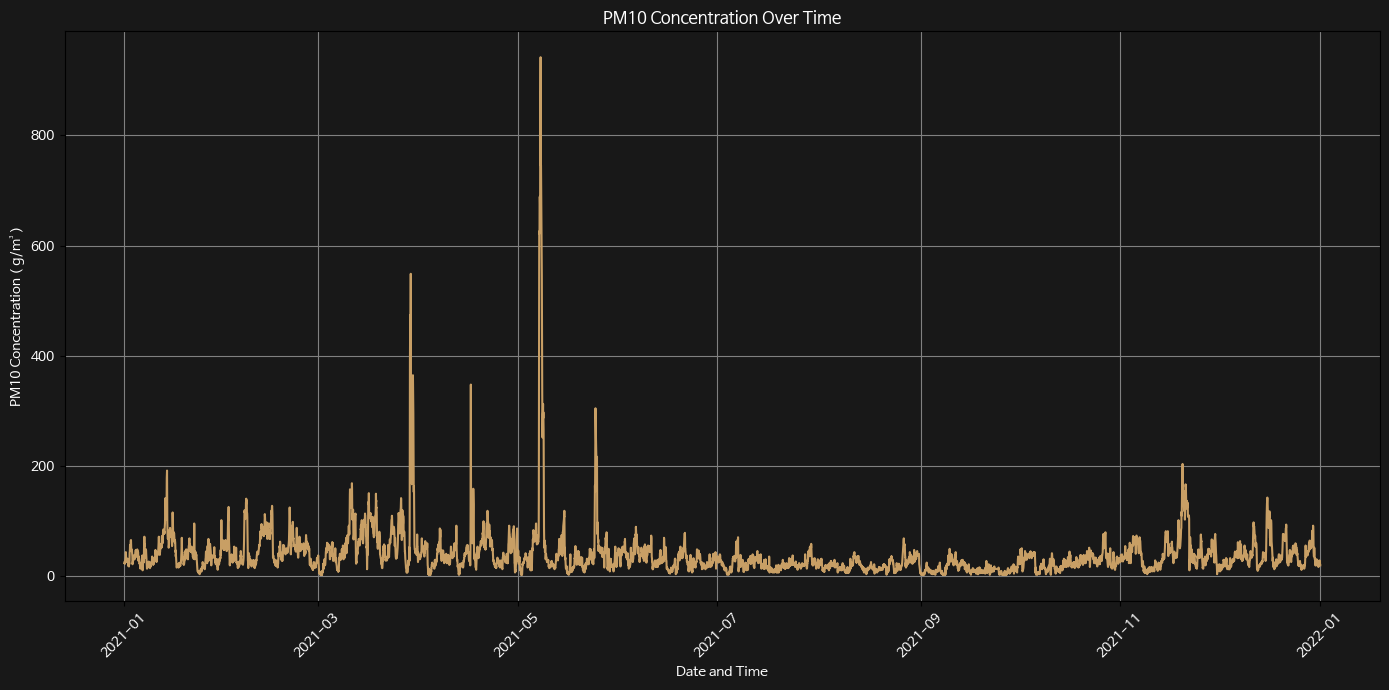

In [30]:
# 측정일시 열을 datetime 형식으로 변환 (이미 변환된 경우 이 라인은 생략해도 됩니다)
air_21['측정일시'] = pd.to_datetime(air_21['측정일시'])

# 시각화
plt.figure(figsize=(14, 7), facecolor='#181818')  # 배경색 설정
ax = sns.lineplot(x='측정일시', y='PM10', data=air_21, color="#c89f65")  # 선 색상 설정
plt.title('PM10 Concentration Over Time', color='white')  # 제목 색상 조정
plt.xlabel('Date and Time', color='white')  # x축 라벨 색상 조정
plt.ylabel('PM10 Concentration (µg/m³)', color='white')  # y축 라벨 색상 조정
plt.xticks(rotation=45, color='white')  # x축 눈금 색상 조정
plt.yticks(color='white')  # y축 눈금 색상 조정

# 그리드 색상 및 안쪽 색상 설정
ax.set_facecolor('#181818')  # 그리드 안쪽 배경색 설정
ax.grid(visible=True, color='gray')  # 그리드 색상 조정

plt.tight_layout()
plt.show()

<ipython-input-31-a79e59a893b9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='시간', y=pollutant, data=air_22, estimator='mean', ci=None, color='#c89f65')  # 선 색상 설정
<ipython-input-31-a79e59a893b9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='시간', y=pollutant, data=air_22, estimator='mean', ci=None, color='#c89f65')  # 선 색상 설정
<ipython-input-31-a79e59a893b9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='시간', y=pollutant, data=air_22, estimator='mean', ci=None, color='#c89f65')  # 선 색상 설정
<ipython-input-31-a79e59a893b9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='시간', y=pollutant, data=air_22, estimator='mean', ci=None, color='#c89f65')  # 선 색상 설정
<ipython-input-31-a79e59a893b9>:9: FutureWarning: 

The `ci` parameter i

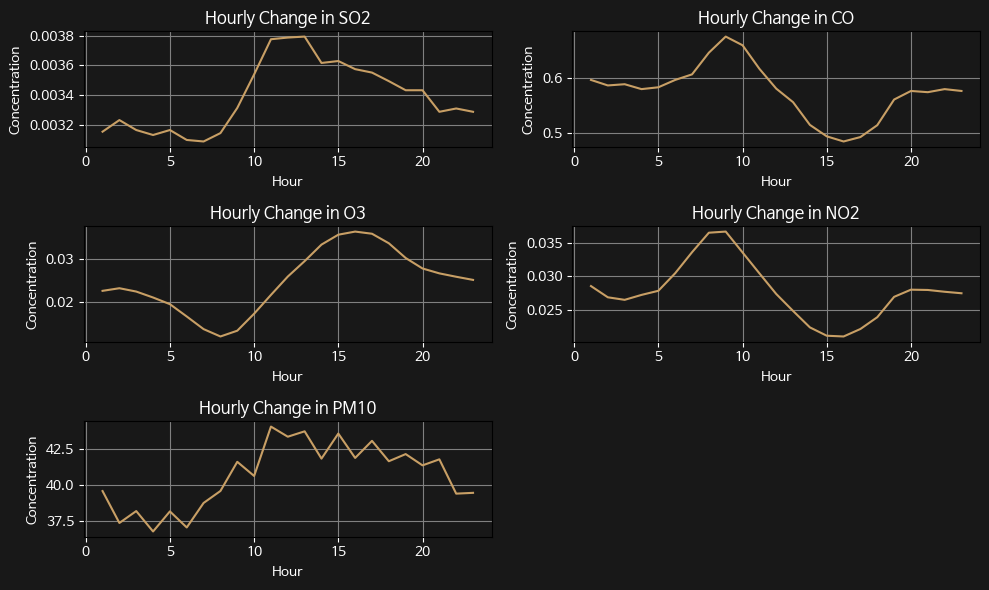

In [31]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10']

# 배경색을 #181818로 설정
plt.figure(figsize=(10, 6), facecolor='#181818')  # 전체 배경색 설정

for i, pollutant in enumerate(pollutants, 1):
    ax = plt.subplot(3, 2, i, facecolor='#181818')  # 각 서브플롯 배경색 설정
    sns.lineplot(x='시간', y=pollutant, data=air_22, estimator='mean', ci=None, color='#c89f65')  # 선 색상 설정
    plt.title(f'Hourly Change in {pollutant}', color='white')  # 제목 색상 조정
    plt.xlabel('Hour', color='white')  # x축 라벨 색상 조정
    plt.ylabel('Concentration', color='white')  # y축 라벨 색상 조정
    plt.tick_params(axis='x', colors='white')  # x축 눈금 색상 조정
    plt.tick_params(axis='y', colors='white')  # y축 눈금 색상 조정
    ax.grid(visible=True, color='gray')  # 그리드 색상 설정

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


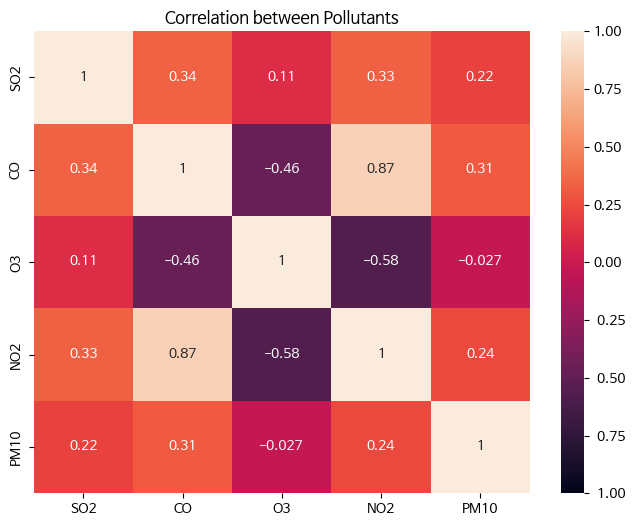

In [27]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(air_21[pollutants].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation between Pollutants')
plt.show()

In [ ]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 시간대별 SO2, O3, PM10의 변화 형상이 비슷
# 2. 하지만 상관계수가 적은 것으로 보아 PM10에 큰 영향을 끼치지는 못할 것으로 추론

---

#### **<span style="color:blue">[1-6] 날씨 데이터 분석</span>**

In [28]:
# weather_21,weather_22 의 다양한 변수에 대하여 시각화
weather_21['일시'] = pd.to_datetime(weather_21['일시'])
weather_22['일시'] = pd.to_datetime(weather_22['일시'])
weather_21['월'] = weather_21['일시'].dt.month
weather_22['월'] = weather_22['일시'].dt.month

<ipython-input-29-703d64ac56ae>:43: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 여백 조정
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


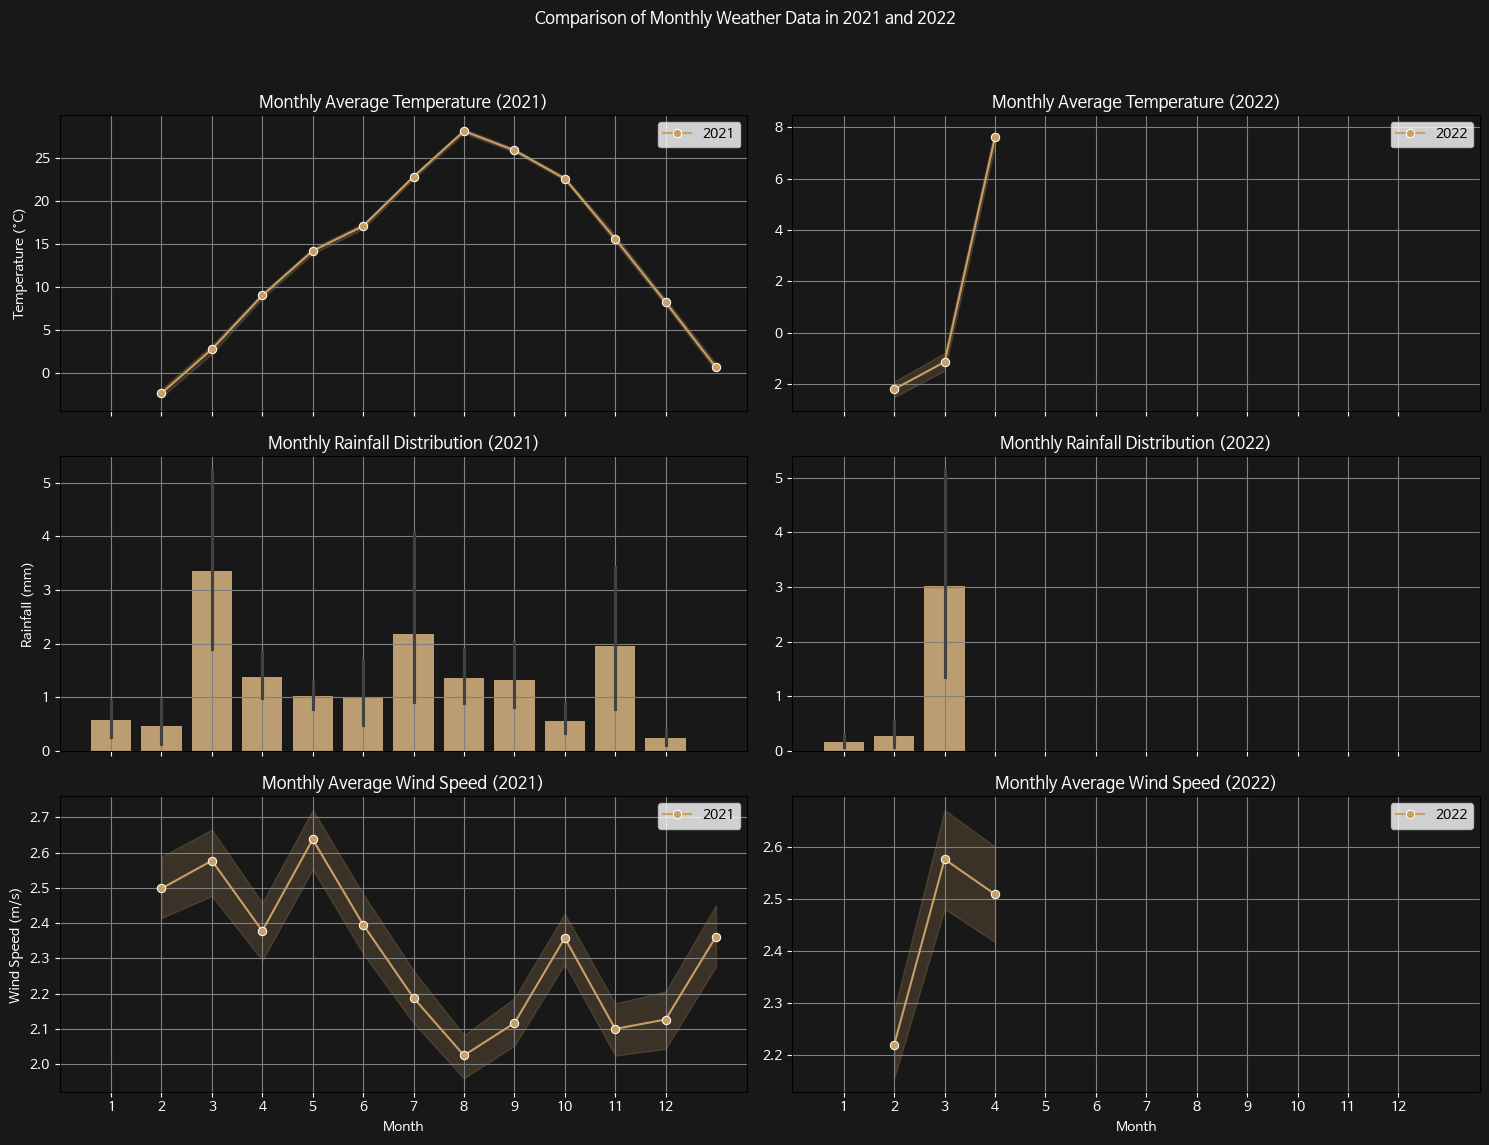

In [29]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)
fig.suptitle("Comparison of Monthly Weather Data in 2021 and 2022", color='white')  # 제목 색상 조정
fig.patch.set_facecolor('#181818')  # 전체 배경색 설정

# 1. 월별 평균 기온 비교
sns.lineplot(ax=axes[0, 0], x='월', y='기온(°C)', data=weather_21, marker='o', color='#c89f65', label='2021')
sns.lineplot(ax=axes[0, 1], x='월', y='기온(°C)', data=weather_22, marker='o', color='#c89f65', label='2022')
axes[0, 0].set_title("Monthly Average Temperature (2021)", color='white')  # 제목 색상 조정
axes[0, 1].set_title("Monthly Average Temperature (2022)", color='white')  # 제목 색상 조정
axes[0, 0].set_ylabel("Temperature (°C)", color='white')  # y축 라벨 색상 조정
axes[0, 1].set_ylabel("")  # y축 라벨 비우기
axes[0, 0].set_xlabel("Month", color='white')  # x축 라벨 색상 조정
axes[0, 1].set_xlabel("Month", color='white')  # x축 라벨 색상 조정

# 2. 월별 강수량 비교
sns.barplot(ax=axes[1, 0], x='월', y='강수량(mm)', data=weather_21, color='#c89f65')
sns.barplot(ax=axes[1, 1], x='월', y='강수량(mm)', data=weather_22, color='#c89f65')
axes[1, 0].set_title("Monthly Rainfall Distribution (2021)", color='white')  # 제목 색상 조정
axes[1, 1].set_title("Monthly Rainfall Distribution (2022)", color='white')  # 제목 색상 조정
axes[1, 0].set_ylabel("Rainfall (mm)", color='white')  # y축 라벨 색상 조정
axes[1, 1].set_ylabel("")  # y축 라벨 비우기
axes[1, 0].set_xlabel("Month", color='white')  # x축 라벨 색상 조정
axes[1, 1].set_xlabel("Month", color='white')  # x축 라벨 색상 조정

# 3. 월별 평균 풍속 비교
sns.lineplot(ax=axes[2, 0], x='월', y='풍속(m/s)', data=weather_21, marker='o', color='#c89f65', label='2021')
sns.lineplot(ax=axes[2, 1], x='월', y='풍속(m/s)', data=weather_22, marker='o', color='#c89f65', label='2022')
axes[2, 0].set_title("Monthly Average Wind Speed (2021)", color='white')  # 제목 색상 조정
axes[2, 1].set_title("Monthly Average Wind Speed (2022)", color='white')  # 제목 색상 조정
axes[2, 0].set_ylabel("Wind Speed (m/s)", color='white')  # y축 라벨 색상 조정
axes[2, 1].set_ylabel("")  # y축 라벨 비우기
axes[2, 0].set_xlabel("Month", color='white')  # x축 라벨 색상 조정
axes[2, 1].set_xlabel("Month", color='white')  # x축 라벨 색상 조정

# 그리드 색상 설정
for ax in axes.flatten():
    ax.set_facecolor('#181818')  # 서브플롯 배경색 설정
    ax.grid(visible=True, color='gray')  # 그리드 색상 설정
    ax.tick_params(axis='x', colors='white')  # x축 눈금 색상 조정
    ax.tick_params(axis='y', colors='white')  # y축 눈금 색상 조정

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 여백 조정
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


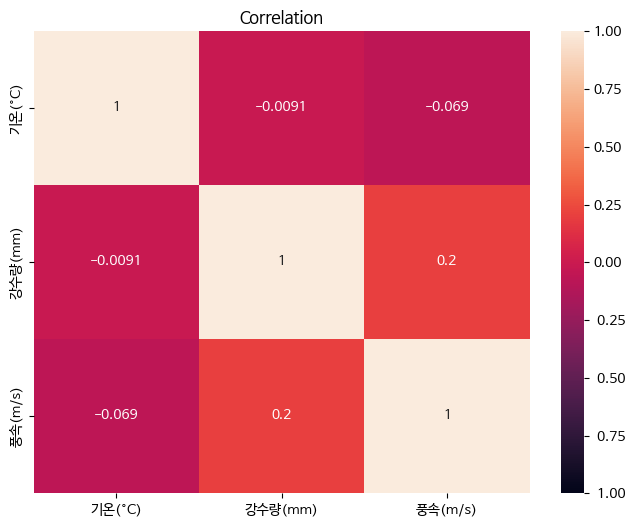

In [33]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(8, 6))
sns.heatmap(weather_21[['기온(°C)', '강수량(mm)', '풍속(m/s)']].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

In [34]:
# 시각화를 통해 알게된 사실을 정리해봅니다.
# 1. 월별 기후 변화를 확인
# 2. PM10 농도가 높은 날에 풍속이 높았음을 알 수 있음
# 3. 봄철 중 강수량이 제일 적은 5월에 PM10이 제일 높음을 확인할 수 있음